# Day 03: Visualizing Data

In [1]:
import matplotlib.pyplot as plt

/usr/lib/python3.6/site-packages/matplotlib/style/core.py:153: UserWarning: In /usr/share/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  library = read_style_directory(BASE_LIBRARY_PATH)
/usr/lib/python3.6/site-packages/matplotlib/style/core.py:153: UserWarning: In /usr/share/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  library = read_style_directory(BASE_LIBRARY_PATH)
/usr/lib/python3.6/site-packages/matplotlib/style/core.py:153: UserWarning: In /usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  library = read_style_directory(BASE_LIBRARY_PATH)
/usr/lib/python3.6/site-packages/matplotlib/style/core.py:153: UserWarning: In /usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle: 
The pgf.debug

In [2]:
from ipywidgets import interact

## Activity 1: Coin Flip

In [84]:
import random

def coin_flips(flips):
    ''' Simulate flipping a coin flips times. '''
    heads = 0
    tails = 0
    
    # Simulate flipping a coin with random (heads = 0, tails = 1)
    for i in range(flips):
        flip = random.randint(0, 1)
        if flip == 0:
            heads += 1
        else:
            tails += 1
    
    # Print totals
    print(heads, tails)
    
    # Plot bar graph
    plt.figure(figsize=(10, 10))
    plt.bar([0, 1], [heads, tails])
    plt.xticks([0, 1], ['heads', 'tails'])
    plt.ylabel('Counts')
    plt.title('Coin Flips Simulation')
    
    # Plot pie graph
    #plt.figure(figsize=(10, 10))
    #plt.pie([heads, tails], labels=['heads', 'tails'])
    #plt.title('Coin Flips Simulation')

44 56


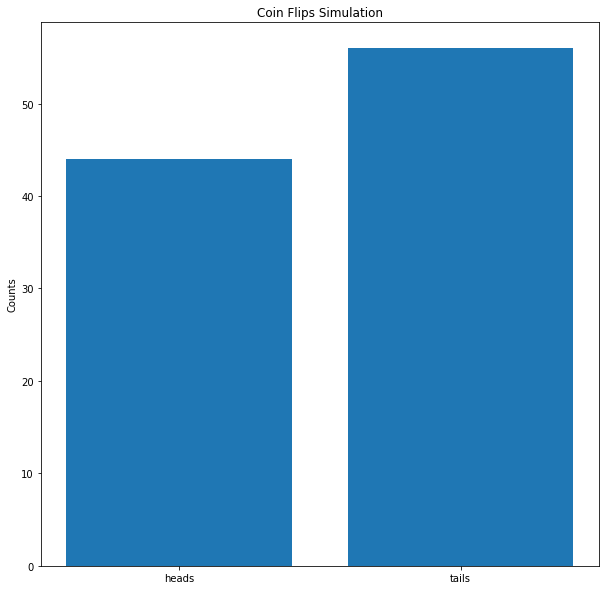

In [85]:
coin_flips(100)

In [88]:
interact(coin_flips, flips=(0, 1000))

interactive(children=(IntSlider(value=500, description='flips', max=1000), Output()), _dom_classes=('widget-in…

<function __main__.coin_flips(flips)>

## Activity 2: Projectile Motion

To model projectile motion, use the following equations to determine the x and y coordinates at a particular time step:

    x(t) = v0*t*cos(theta)
    y(t) = v0*t*sin(theta) - 1/2*g*t^2
    
where

    x(t)    x coordinate a time step t
    y(t)    y coordinate a time step t
    v0      the initial velocity
    theta   the initial angle
    g       gravity acceleration constant (9.81)
    t       time step (seconds)

To compute the displacement or the coordinates of the projectile over time, you should do something like the following:

    for each time step t in time range
        compute x(t)
        compute y(t)

    if y(t) < 0 # Stop once we hit the ground
        break

    store x(t), y(t)

In [68]:
import math

GRAVITY = 9.81

def projectile_motion(v0, theta, time_limit=100, time_step=0.1):
    ''' Simulate the motion of a projectile over time given:

        v0          The initial velocity
        theta       The initial angle
        time_limit  Maximum flight time
        time_step   The amount of time between calculating the displacement
        
    '''
    
    xs    = []
    ys    = []
    theta = math.radians(theta)
    
    for i in range(int(time_limit / time_step)):
        t = i * time_step
        x = v0 * t * math.cos(theta)
        y = v0 * t * math.sin(theta) - (0.5 * GRAVITY * t**2)
        
        if y < 0:
            break
        
        xs.append(x)
        ys.append(y)
    
    #print(xs, ys)
    plt.figure(figsize=(6, 4))
    plt.xlim([0, 500])
    plt.ylim([0, 300])
    plt.plot(xs, ys, linewidth=4)

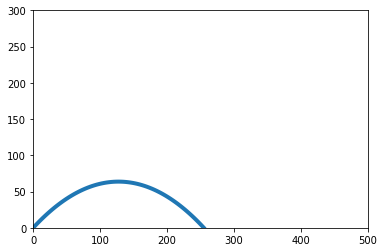

In [69]:
projectile_motion(50, 45)

In [70]:
interact(projectile_motion, v0=(0, 100), theta=(0, 90.0))

interactive(children=(IntSlider(value=50, description='v0'), FloatSlider(value=45.0, description='theta', max=…

<function __main__.projectile_motion(v0, theta, time_limit=100, time_step=0.1)>

## Activity 3: Monte Carlo Simulation of Pi

In [81]:
import random

def simulate_pi(darts):
    ''' Perform a Monte Carlo simulation to determine the value of Pi '''
    
    circle_xs = []
    circle_ys = []
    square_xs = []
    square_ys = []
    
    for i in range(darts):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if math.hypot(x, y) <= 1.0:
            circle_xs.append(x)
            circle_ys.append(y)
        else:
            square_xs.append(x)
            square_ys.append(y)
            
    in_circle = len(circle_xs)
    in_square = darts
            
    pi = 4.0 * in_circle / in_square
    
    #print(circle_xs, circle_ys, square_xs, square_ys, pi)
    
    print(pi)
    plt.figure(figsize=(8, 8))
    plt.scatter(circle_xs, circle_ys, color='b')
    plt.scatter(square_xs, square_ys, color='y')

3.112


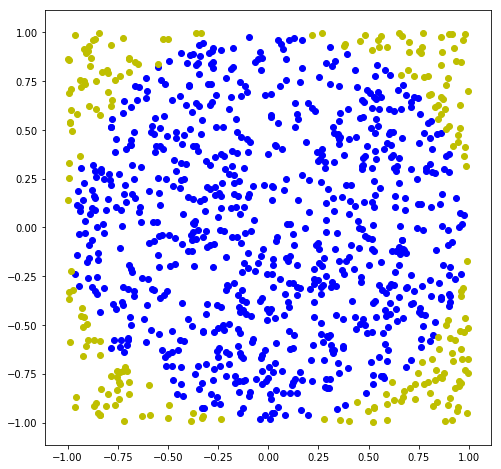

In [82]:
simulate_pi(1000)

In [83]:
interact(simulate_pi, darts=(0, 1000))

interactive(children=(IntSlider(value=500, description='darts', max=1000), Output()), _dom_classes=('widget-in…

<function __main__.simulate_pi(darts)>